#### 1. Import Dependencies

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Basic Processing


In [26]:
df = pd.read_csv("data/processed/CEHHbInToW_missing_valued_handled.csv")
df.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [27]:
print(f"number of row : {len(df)}")

number of row : 10000


### 3. Outlier Detection Technique

#### 3.1. Distribution plots

In [28]:
categorical_columns = [
    'Geography', 'Gender', 
    'NumOfProducts', 'HasCrCard', 
    'IsActiveMember', 'Exited'
]

numerical_columns = ['CreditScore',	'Age',
                     'Tenure',	'Balance',
                     'EstimatedSalary'
                     ]

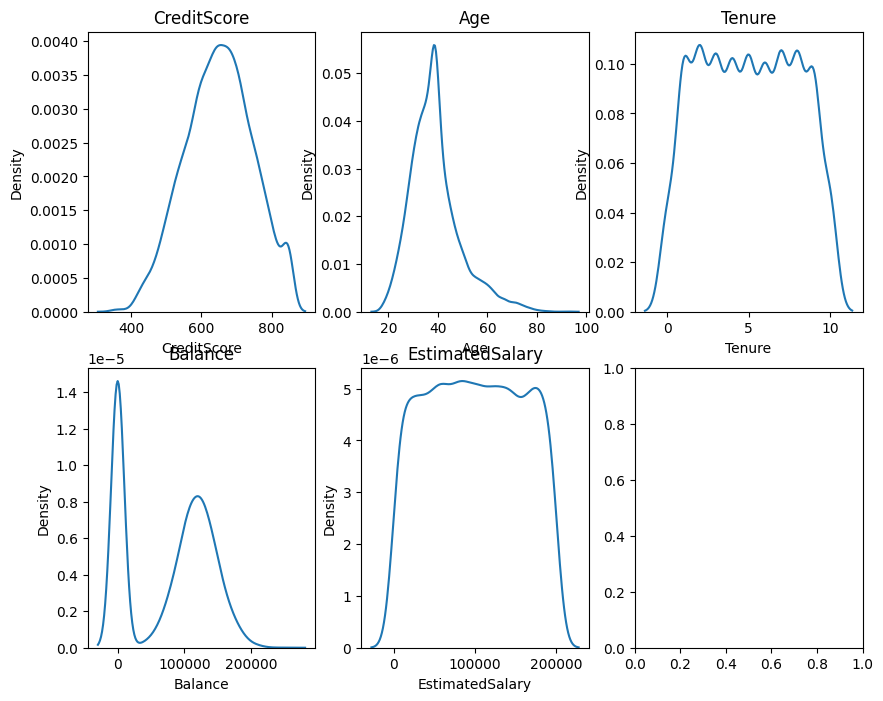

In [29]:
flg, axes = plt.subplots(2,3, figsize=(10,8))

axes = axes.flatten()

for indx, col in enumerate(numerical_columns):
    sns.kdeplot(
                data=df[col], 
                ax=axes[indx]
                )
    axes[indx].set_title(col)

plt.show()

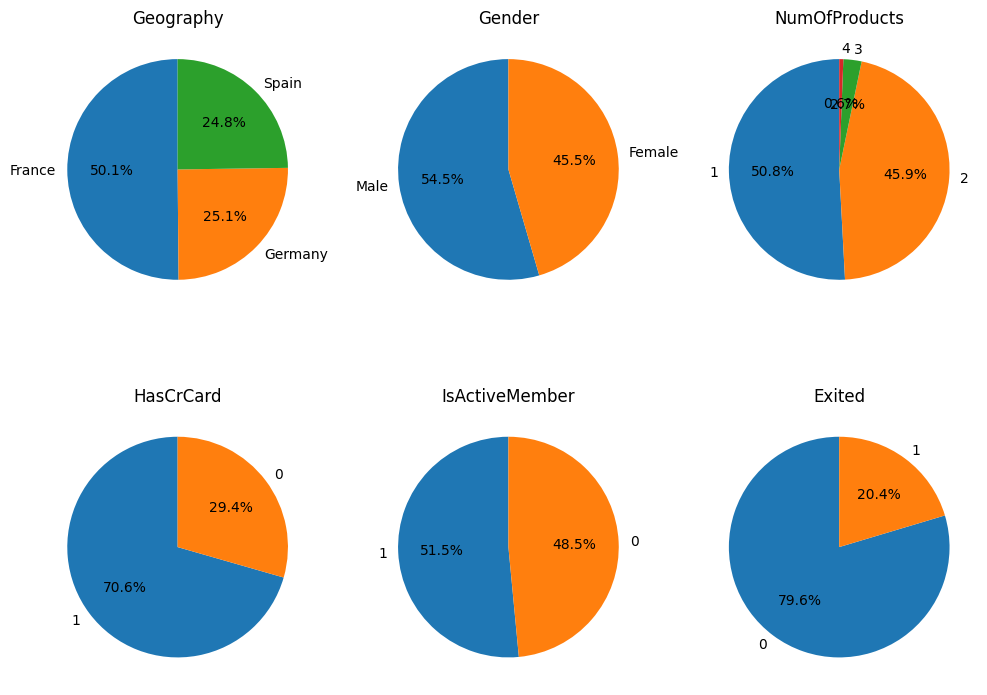

"\nfor indx, col in enumerate(categorical_columns):\n    df[col].value_counts().plot(\n                        kind= 'pie',\n                        ax = axes[indx]\n                    )\n\n"

In [30]:
flg, axes = plt.subplots(2,3,figsize=(10,8))
axes = axes.flatten()

for indx, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    axes[indx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[indx].set_title(col)

plt.tight_layout()
plt.show()

"""
for indx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                        kind= 'pie',
                        ax = axes[indx]
                    )
    
"""



#### 3.2 Box Plots

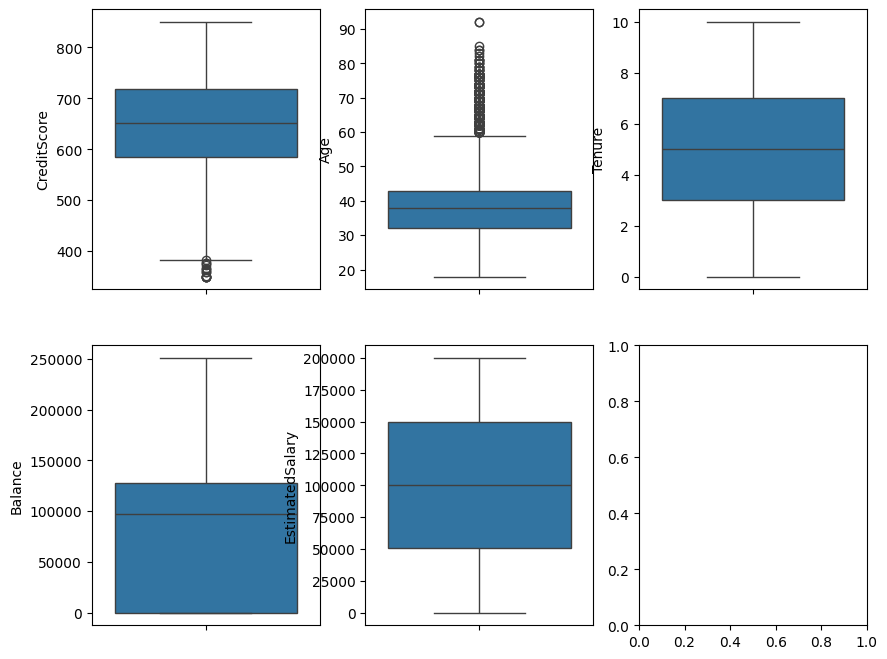

In [31]:
flg, axes = plt.subplots(2,3, figsize=(10,8))

axes = axes.flatten()

for indx, col in enumerate(numerical_columns):
    sns.boxplot(data=df[col], 
                ax=axes[indx])

plt.show()

#### 3.3. empirical rule/ 3-sigma rule

In [35]:

def find_anomoly(data):

    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3*std)
    lower_bound = mean - (3*std)

    return ((data > upper_bound) | (data < lower_bound))



In [37]:
numerical_columns = ['CreditScore',	'Age',
                     'Tenure',	'Balance',
                     'EstimatedSalary'
                     ]

for col in numerical_columns:
    n_ouliers = find_anomoly(df[col]).sum()
    n_ouliers_precentage = round(n_ouliers / len(df),2) *100
    print(f"{col} : {n_ouliers} outliers ({n_ouliers_precentage} %)")
    


CreditScore : 8 outliers (0.0 %)
Age : 144 outliers (1.0 %)
Tenure : 0 outliers (0.0 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)


#### 3.4 IQR Method

In [38]:
def find_anomoly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bowned = Q3 + (1.5 * IQR)
    lower_bowned = Q1 - (1.5 * IQR)

    return (data > upper_bowned) | (data < lower_bowned)




In [39]:
numerical_columns = ['CreditScore',	'Age',
                     'Tenure',	'Balance',
                     'EstimatedSalary'
                     ]

for col in numerical_columns:
    n_ouliers = find_anomoly(df[col]).sum()
    n_ouliers_precentage = round(n_ouliers / len(df),2) *100
    print(f"{col} : {n_ouliers} outliers ({n_ouliers_precentage} %)")
    


CreditScore : 15 outliers (0.0 %)
Age : 501 outliers (5.0 %)
Tenure : 0 outliers (0.0 %)
Balance : 0 outliers (0.0 %)
EstimatedSalary : 0 outliers (0.0 %)


- let says we have decided to remove the raw that have more than one outliers values.how to find this?

In [46]:
outlier_mask_log = pd.DataFrame()

numerical_columns = ['CreditScore',	'Age',
                     'Tenure',	'Balance',
                     'EstimatedSalary'
                     ]

for col in numerical_columns:
    outlier_mask_log[col] = find_anomoly(df[col])
    
outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['count'] == 2]
print(outlier_mask_log)

      CreditScore   Age  Tenure  Balance  EstimatedSalary  count
8762         True  True   False    False            False      2
